# A.3 The LBM Code for a lid-driven cavity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

n = 100
m = 100
f = np.zeros((9,n+1,m+1), dtype=float)
feq = np.zeros((9,n+1,m+1), dtype=float)
u = np.zeros((n+1,m+1), dtype=float)
v = np.zeros((n+1,m+1), dtype=float)
w = np.zeros(9, dtype=float)
cx = np.zeros(9, dtype=float)
cy = np.zeros(9, dtype=float)

u0 = 0.1
sumvel0 = 0.0
rho0 = 5.0
dx = 1.0
dy = 1.0
dt = 1.0
alpha = 0.01
Re = u0*m/alpha
omega = 1.0/(3.0*alpha + 0.5)
mstep = 40000
w = [4/9,1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]
cx = [0,1,0,-1,0,1,-1,-1,1]
cy = [0,0,1,0,-1,1,1,-1,-1]
rho = rho0 * np.ones((n+1,m+1), dtype=float)
for i in range(1,n):
    u[i,m] = u0
    v[i,m] = 0.0

def collesion():
    global u,v,f,feq,rho,omega,w,cx,cy,m
    for i in range(0,n+1):
        for j in range(0,m+1):
            t1 = u[i,j] * u[i,j] + v[i,j]*v[i,j]
            for k in range(0,9):
                t2 = u[i,j]*cx[k] + v[i,j]*cy[k]
                feq[k,i,j] = rho[i,j]*w[k]*(1.0 + 3.0*t2 + 4.5*t2*t2 - 1.5*t1)
                f[k,i,j] = omega*feq[k,i,j] + (1.0-omega)*f[k,i,j]
                
                
def streaming():
    global f,n,m
    for j in range(0,m+1):
        for i in range(n,0,-1):    # right to left
            f[1,i,j] = f[1,i-1,j]
        for i in range(0,n):    # left to right
            f[3,i,j] = f[3,i+1,j]
            
    for j in range(m,0,-1):    # top to bottom
        for i in range(0,n+1):
            f[2,i,j] = f[2,i,j-1]
        for i in range(n,0,-1):
            f[5,i,j] = f[5,i-1,j-1]
        for i in range(0,n):
            f[6,i,j] = f[6,i+1,j-1]
            
    for j in range(0,m):    # bottom to top
        for i in range(0,n+1):
            f[4,i,j] = f[4,i,j+1]
        for i in range(0,n):
            f[7,i,j] = f[7,i+1,j+1]
        for i in range(n,0,-1):
            f[8,i,j] = f[8,i-1,j+1]

def sfbound():
    global f,n,m,u0
    for j in range(0,m+1):
        # bounce back on west boundary
        f[1,0,j] = f[3,0,j]
        f[5,0,j] = f[7,0,j]
        f[8,0,j] = f[6,0,j]
        # bounce back on east boundary
        f[3,n,j] = f[1,n,j]
        f[7,n,j] = f[5,n,j]
        f[6,n,j] = f[8,n,j]
        
    # bounce back on south boundary
    for i in range(0,n+1):
        f[2,i,0] = f[4,i,0]
        f[5,i,0] = f[7,i,0]
        f[6,i,0] = f[8,i,0]
        
    # moving lid, north boundary
    for i in range(1,n):
        rhon = f[0,i,m] + f[1,i,m] + f[3,i,m] + 2.0*(f[2,i,m] + f[6,i,m] + f[5,i,m])
        f[4,i,m] = f[2,i,m]
        f[8,i,m] = f[6,i,m] + rhon*u0/6.0
        f[7,i,m] = f[5,i,m] - rhon*u0/6.0

def rhouv():
    global f,rho,u,v,cx,cy,n,m
    for j in range(0,m+1):
        for i in range(0,n+1):
            ssum = 0.0
            for k in range(0,9):
                ssum += f[k,i,j]
            rho[i,j] = ssum
            
    for i in range(1,n+1):
        rho[i,m] = f[0,i,m] + f[1,i,m] + f[3,i,m] + 2.0*(f[2,i,m] + f[6,i,m] + f[5,i,m])
        
    for i in range(1,n+1):
        for j in range(1,m):
            usum = 0.0
            vsum = 0.0
            for k in range(0,9):
                usum += f[k,i,j]*cx[k]
                vsum += f[k,i,j]*cy[k]
            u[i,j] = usum/rho[i,j]
            v[i,j] = vsum/rho[i,j]

# main loop
for kk in range(1,mstep+1):
    collesion()
    streaming()
    sfbound()
    rhouv()

计算时间共花费约3.5小时。

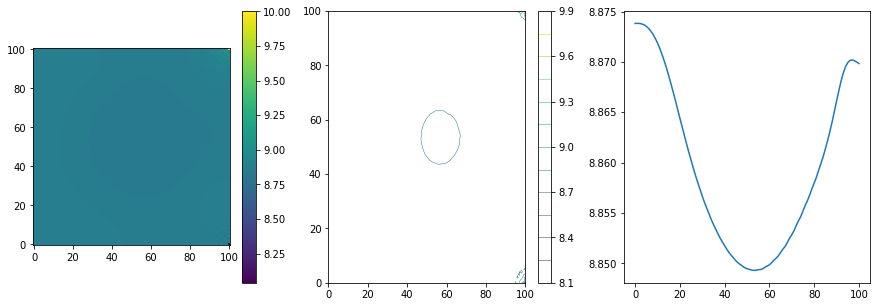

In [6]:
temp = rho[:,50]
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.plot(temp)

plt.subplot(1, 3, 2)
plt.contour(rho,18,linewidths=0.5)
plt.colorbar()

plt.subplot(1, 3, 1)
plt.imshow(rho, interpolation='nearest', origin='lower')
plt.colorbar()

plt.show()